<a href="https://colab.research.google.com/github/valentinedum/room_occupancy_estimation/blob/main/notebooks/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avant de commencer: Faire un raccourci du drive partagé dans le drive personnel pour y accéder dans google colab.

On récupère la dataset

In [1]:
!wget https://raw.githubusercontent.com/riadh-lab-ux/Occupancy_Estimation/main/data/Occupancy_Estimation.csv

--2025-05-25 15:54:23--  https://raw.githubusercontent.com/riadh-lab-ux/Occupancy_Estimation/main/data/Occupancy_Estimation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 931630 (910K) [text/plain]
Saving to: ‘Occupancy_Estimation.csv’

Occupancy_Estimatio 100%[===================>] 909.79K  --.-KB/s    in 0.01s   

2025-05-25 15:54:23 (68.9 MB/s) - ‘Occupancy_Estimation.csv’ saved [931630/931630]



In [3]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import os
import sys

from pandas.plotting import scatter_matrix

csv_path = "C:/Users/riadh/Desktop/room_occupancy_estimation/data/Occupancy_Estimation.csv"
df = pd.read_csv(csv_path)

# Afficher les premières lignes du dataset
df.head(10)


,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1
6,2017/12/22,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,1.39,0.32,0.43,0.06,390,0.076923,1,0,1
7,2017/12/22,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,0.09,0.06,0.09,0.05,390,-0.011538,0,0,1
8,2017/12/22,10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,0.09,0.05,0.06,0.13,390,-0.100000,0,0,1
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,3.84,0.64,0.48,0.39,390,-0.188462,1,1,1


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

On a des données sur la Température, lumière, son, CO₂, détection de mouvement (PIR), etc. Pas de valeurs manquantes, mais types objets pour date/heure.

In [5]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


La variable cible est Room_Occupancy_Count qui représente le nombre de personnes dans la pièce.
Il y a une présence d’outliers marqués (écarts importants entre percentiles).  Par exemple, la lumière et le CO₂ ont des plages de valeurs très étendues.

In [6]:
df.shape

(10129, 19)

In [7]:
df.duplicated().sum()

np.int64(0)

On n'a pas des lignes dupliquées

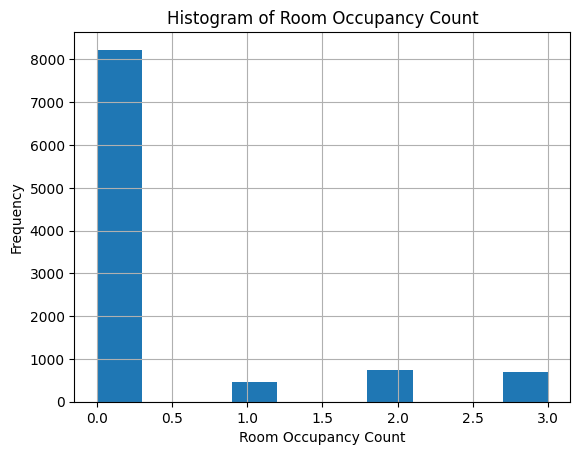

In [8]:
df['Room_Occupancy_Count'].hist()
plt.title('Histogram of Room Occupancy Count')
plt.xlabel('Room Occupancy Count')
plt.ylabel('Frequency')
plt.show()

On remarque la classe n'est pas équilibrée on n'a plus de données pour 0 occupancy que pour les autres

<Axes: >

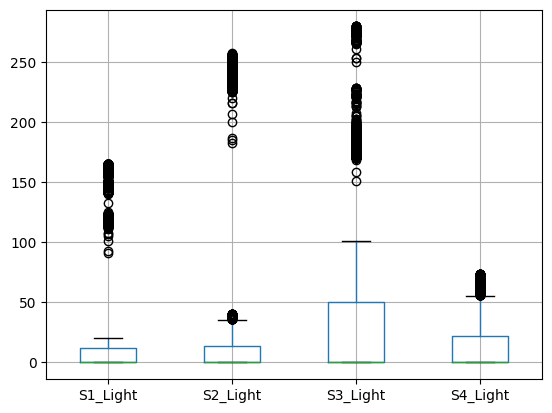

In [9]:
df.boxplot(column=['S1_Light', 'S2_Light', 'S3_Light' , 'S4_Light' ])

Fortes valeurs extrêmes possibles.

<Axes: >

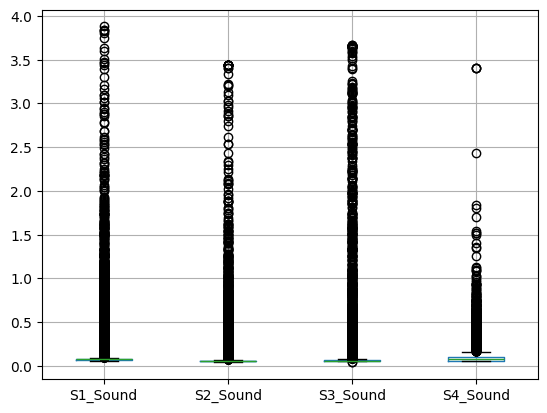

In [10]:
df.boxplot(column=['S1_Sound', 'S2_Sound', 'S3_Sound' , 'S4_Sound' ])

Comme pour la lumière, le son présente aussi des outliers.

<Axes: >

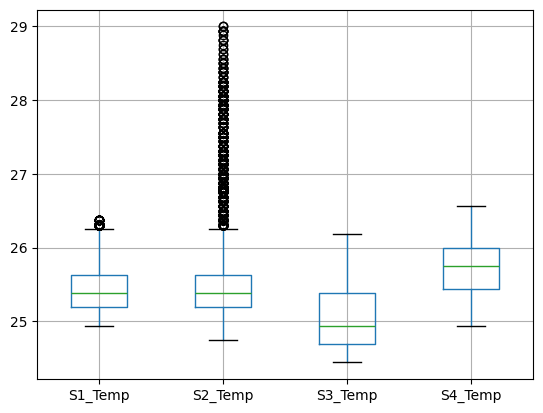

In [11]:
df.boxplot(column=['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'])

Moins d’outliers que pour la lumière/son, mais quelques valeurs aberrantes.

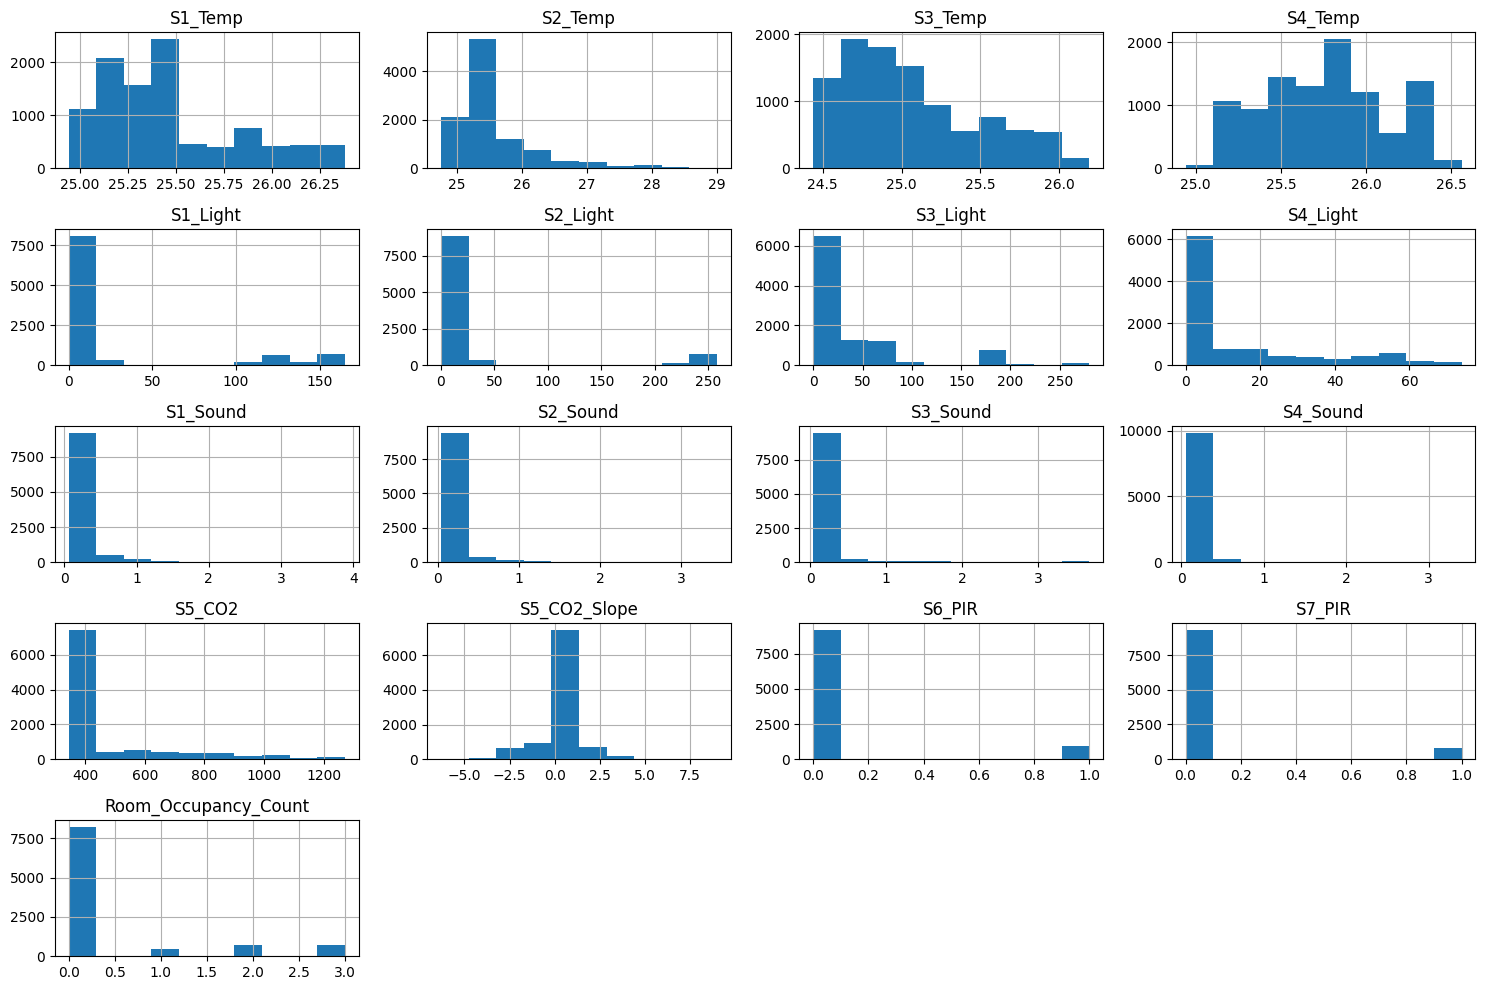

In [12]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Certaines variables (ex. S5_CO2) ont une distribution décalée à gauche.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

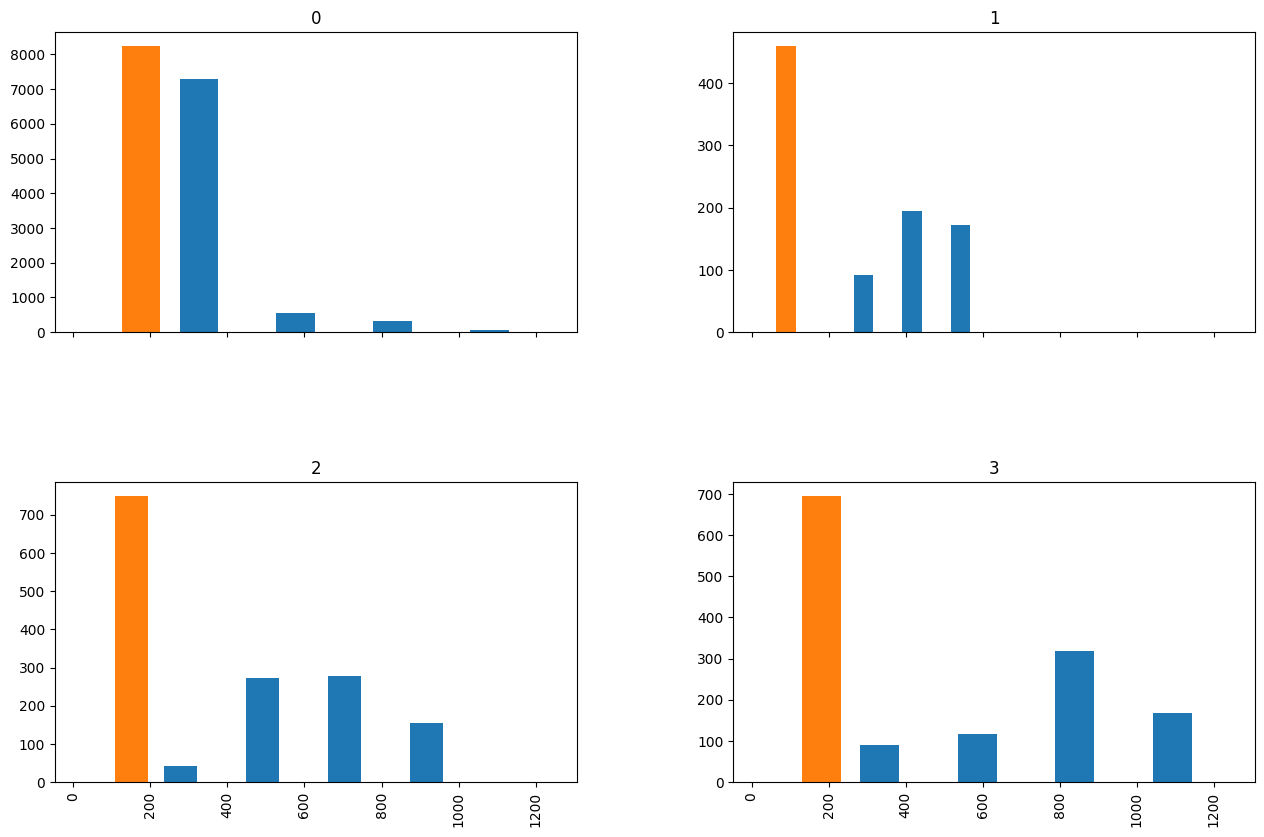

In [13]:
# sharex imposes all the plots to have the same x range
# (otherwise visual comparison is different).
df[['S5_CO2', 'Room_Occupancy_Count']].hist(figsize=(15,10), by='Room_Occupancy_Count',
                                    sharex=True, bins = 5)

la concentration de CO₂ diffère selon l’occupation. Elle augmente avec l'augmentation du room occupancy (présence des valeurs entre 1000 et 1200 pour occupancy 3)

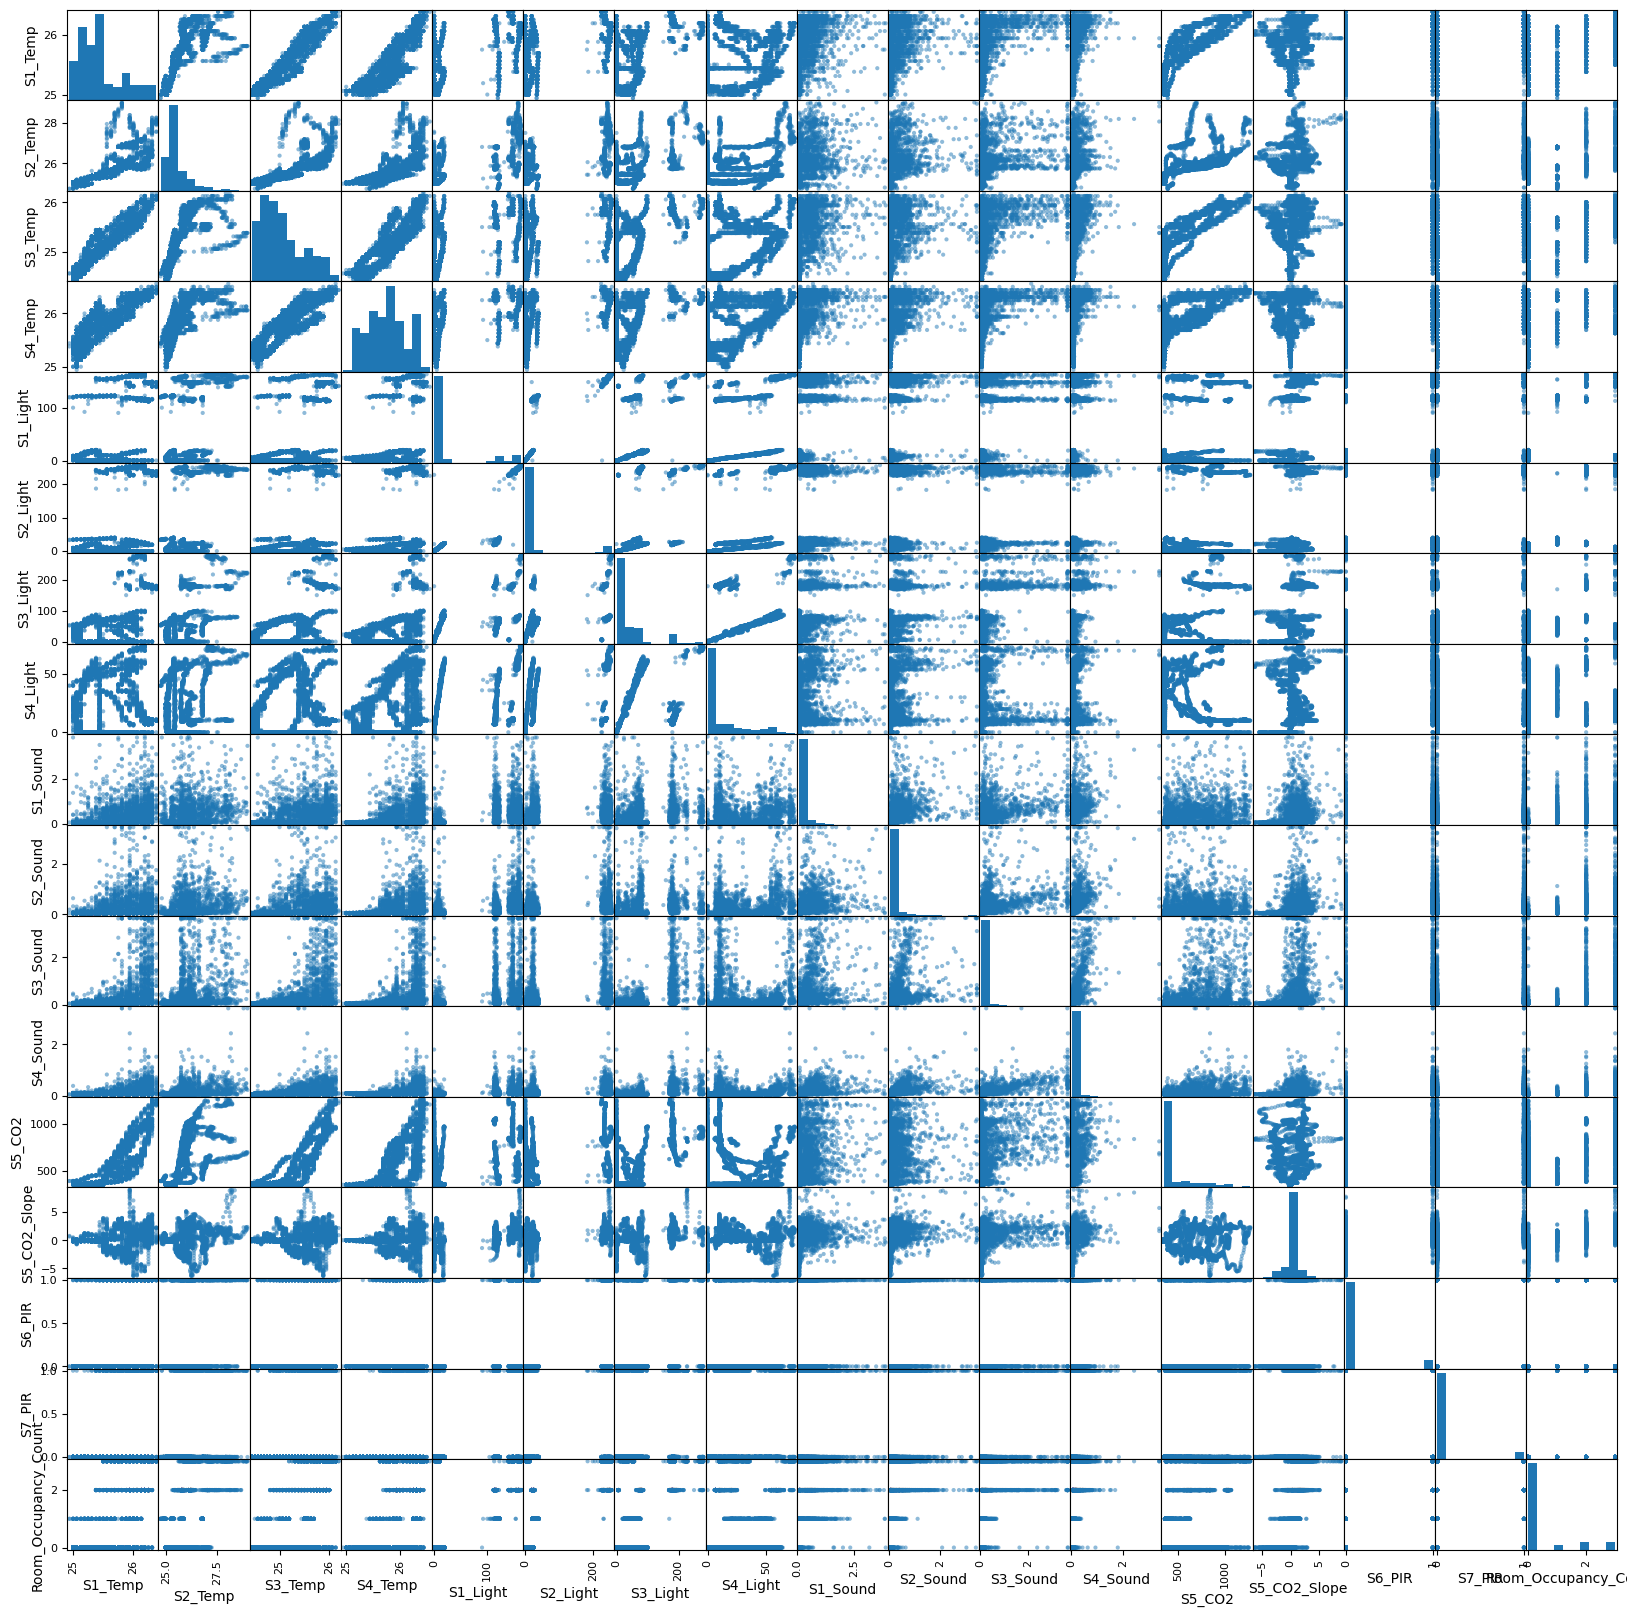

In [14]:
sm = scatter_matrix(df,figsize=(20,20))

plt.show()

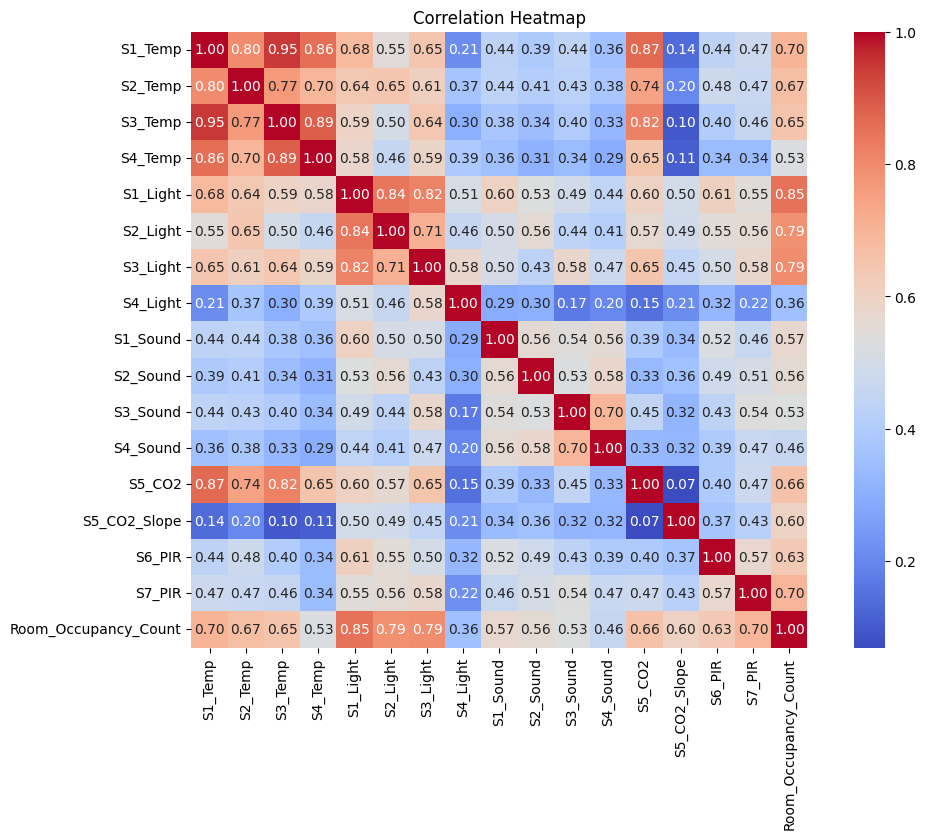

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(df.iloc[:, 2:].corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)

plt.title("Correlation Heatmap")
plt.show()


On remarque une corrélation élevée entre les capteurs de températures. De meme pour les capteurs de lumière. Et une corrélation élevée entre S5_CO2 et les capteurs de températures. De meme une corrélation élevée entre les 3 premiers capteurs de températures et  les capteurs de lumière avec la classe room occupancy count

In [15]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=65375d329d6baf740c945c015d4b50eec4bc08e57033fd0fdc1d32bd59ea4358
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [16]:
import wget
url = "https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py"
wget.download(url)


'visualization.py'

In [17]:
import visualization

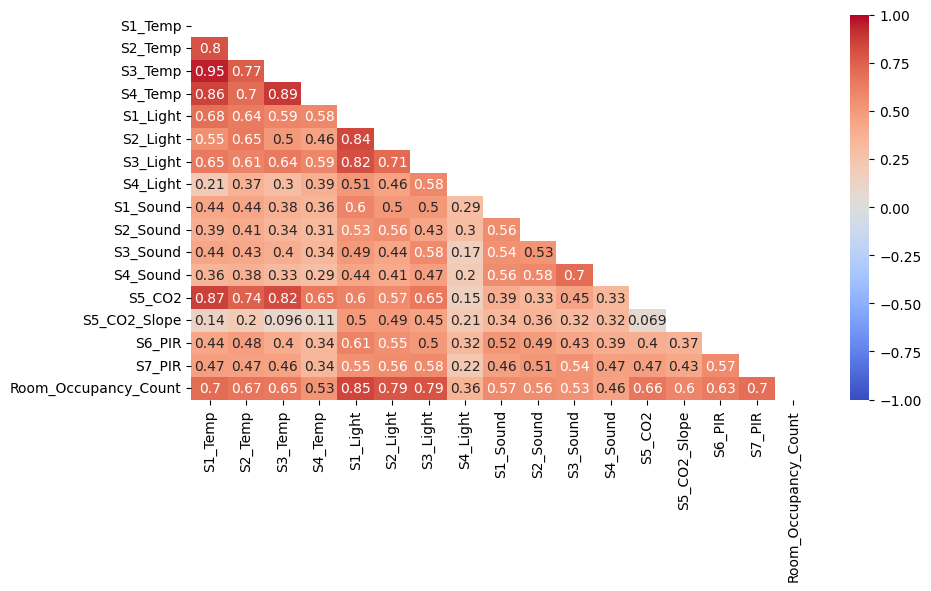

In [18]:
visualization.plot_corr(df.iloc[: , 2:], width=10, height=5,
                        print_value=True)

In [19]:
# From the course library
url ="https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py"
wget.download(url)
import feature_engineering

In [20]:
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df.iloc[ : ,2:], target_feature='Room_Occupancy_Count')
features_corr

Room_Occupancy_Count    1.00
S1_Light                0.85
S3_Light                0.79
S2_Light                0.79
S1_Temp                 0.70
S7_PIR                  0.70
S2_Temp                 0.67
S5_CO2                  0.66
S3_Temp                 0.65
S6_PIR                  0.63
S5_CO2_Slope            0.60
S1_Sound                0.57
S2_Sound                0.56
S3_Sound                0.53
S4_Temp                 0.53
S4_Sound                0.46
S4_Light                0.36
Name: Room_Occupancy_Count, dtype: float64

On remarque que les 3 premiers capteurs de lumière on la corrélation la plus importante avec la classe

# Transformation

In [21]:
df.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

changer type Object to datetime

In [22]:
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(columns=['Date', 'Time'], inplace=True)


In [23]:
df.dtypes


S1_Temp                        float64
S2_Temp                        float64
S3_Temp                        float64
S4_Temp                        float64
S1_Light                         int64
S2_Light                         int64
S3_Light                         int64
S4_Light                         int64
S1_Sound                       float64
S2_Sound                       float64
S3_Sound                       float64
S4_Sound                       float64
S5_CO2                           int64
S5_CO2_Slope                   float64
S6_PIR                           int64
S7_PIR                           int64
Room_Occupancy_Count             int64
timestamp               datetime64[ns]
dtype: object

In [24]:

df.head()


,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,timestamp
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,2017-12-22 10:49:41
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,2017-12-22 10:50:12
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,2017-12-22 10:50:42
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,2017-12-22 10:51:13
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,2017-12-22 10:51:44


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
numeric_cols = df.select_dtypes(include='number').columns
print(numeric_cols)


Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')


 Exclure les colonnes cibles et non capteurs

In [27]:

excluded_cols = ['Room_Occupancy_Count', 'timestamp']  # tu peux en ajouter d'autres ici
numeric_cols = df.select_dtypes(include='number').columns
sensor_cols = [col for col in numeric_cols if col not in excluded_cols]




 Boucle de détection d'outliers sur les capteurs uniquement


In [28]:
for col in sensor_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} → {len(outliers)} valeurs aberrantes détectées")

S1_Temp → 162 valeurs aberrantes détectées
S2_Temp → 948 valeurs aberrantes détectées
S3_Temp → 0 valeurs aberrantes détectées
S4_Temp → 0 valeurs aberrantes détectées
S1_Light → 1716 valeurs aberrantes détectées
S2_Light → 1017 valeurs aberrantes détectées
S3_Light → 950 valeurs aberrantes détectées
S4_Light → 543 valeurs aberrantes détectées
S1_Sound → 1772 valeurs aberrantes détectées
S2_Sound → 1703 valeurs aberrantes détectées
S3_Sound → 1671 valeurs aberrantes détectées
S4_Sound → 721 valeurs aberrantes détectées
S5_CO2 → 1657 valeurs aberrantes détectées
S5_CO2_Slope → 4033 valeurs aberrantes détectées
S6_PIR → 913 valeurs aberrantes détectées
S7_PIR → 806 valeurs aberrantes détectées


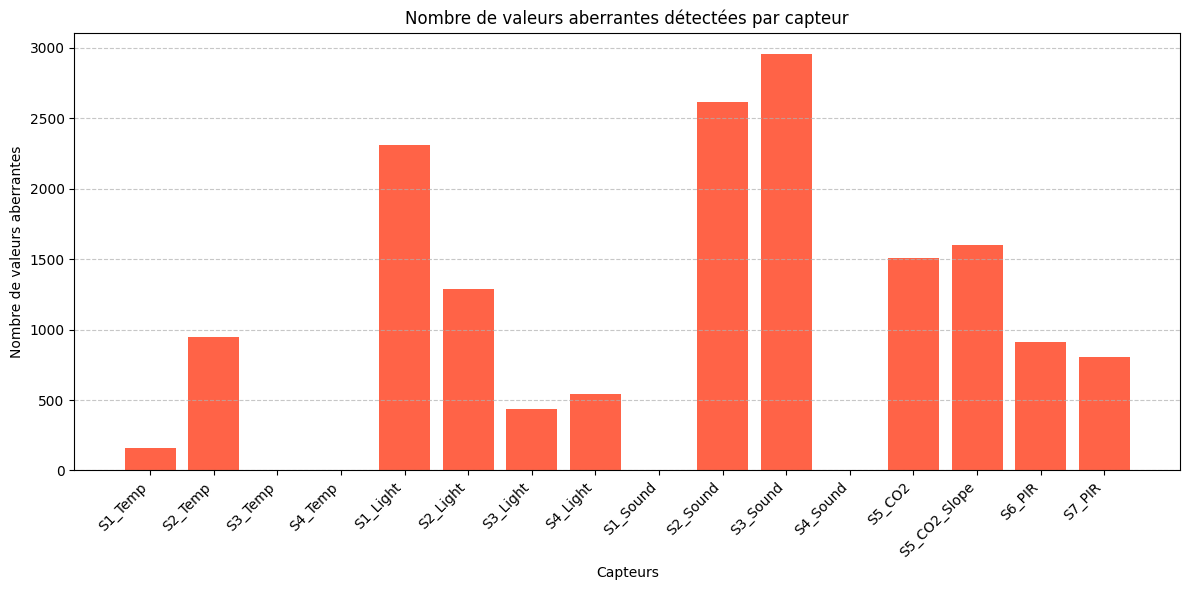

In [110]:
import matplotlib.pyplot as plt

outlier_counts = {}

for col in sensor_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# 📊 Tracer les résultats
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='tomato')
plt.xticks(rotation=45, ha='right')
plt.title("Nombre de valeurs aberrantes détectées par capteur")
plt.xlabel("Capteurs")
plt.ylabel("Nombre de valeurs aberrantes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


 Liste des colonnes concernées (les plus bruitées)


In [29]:
cols_to_clean = [
    'S2_Temp',
    'S1_Light', 'S2_Light', 'S3_Light',
    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
    'S5_CO2', 'S5_CO2_Slope'
]




 Remplacement des outliers par la médiane (méthode IQR)


In [30]:
for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()

    # Remplace les outliers par la médiane
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

    print(f"{col} : outliers remplacés par la médiane.")

S2_Temp : outliers remplacés par la médiane.
S1_Light : outliers remplacés par la médiane.
S2_Light : outliers remplacés par la médiane.
S3_Light : outliers remplacés par la médiane.
S1_Sound : outliers remplacés par la médiane.
S2_Sound : outliers remplacés par la médiane.
S3_Sound : outliers remplacés par la médiane.
S4_Sound : outliers remplacés par la médiane.
S5_CO2 : outliers remplacés par la médiane.
S5_CO2_Slope : outliers remplacés par la médiane.


In [31]:
y = df['Room_Occupancy_Count']


Définir X "features"  les plus corrélées

In [32]:
selected_features = [
    # Température
    'S1_Temp', 'S2_Temp', 'S3_Temp',

    # Lumière (les plus corrélés)
    'S1_Light', 'S2_Light', 'S3_Light',

    # Son (modéré mais utile)
    'S1_Sound', 'S2_Sound', 'S3_Sound',

    # Mouvement
    'S6_PIR', 'S7_PIR',

    # Air
    'S5_CO2', 'S5_CO2_Slope'
]
X = df[selected_features]
X.head()


,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S6_PIR,S7_PIR,S5_CO2,S5_CO2_Slope
0,24.94,24.75,24.56,0.0,34.0,53.0,0.08,0.05,0.06,0,0,390.0,0.0
1,24.94,24.75,24.56,0.0,33.0,53.0,0.08,0.05,0.06,0,0,390.0,0.0
2,25.00,24.75,24.50,0.0,34.0,53.0,0.08,0.05,0.08,0,0,390.0,0.0
3,25.00,24.75,24.56,0.0,34.0,53.0,0.08,0.05,0.06,0,0,390.0,0.0
4,25.00,24.75,24.56,0.0,34.0,54.0,0.08,0.06,0.06,0,0,390.0,0.0


normalisation des données pour que les coefficients soient comparables et qu'on puisse faire la régularisation après

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [34]:
X_scaled.head()

,S1_Temp,S2_Temp,S3_Temp,S1_Light,S2_Light,S3_Light,S1_Sound,S2_Sound,S3_Sound,S6_PIR,S7_PIR,S5_CO2,S5_CO2_Slope
0,-1.463033,-2.281703,-1.162334,-0.486218,3.731014,1.406082,0.75588,0.016377,-0.057855,-0.314749,-0.294029,0.204883,0.191725
1,-1.463033,-2.281703,-1.162334,-0.486218,3.605230,1.406082,0.75588,0.016377,-0.057855,-0.314749,-0.294029,0.204883,0.191725
2,-1.292255,-2.281703,-1.302764,-0.486218,3.731014,1.406082,0.75588,0.016377,3.349213,-0.314749,-0.294029,0.204883,0.191725
3,-1.292255,-2.281703,-1.162334,-0.486218,3.731014,1.406082,0.75588,0.016377,-0.057855,-0.314749,-0.294029,0.204883,0.191725
4,-1.292255,-2.281703,-1.162334,-0.486218,3.731014,1.444088,0.75588,1.839277,-0.057855,-0.314749,-0.294029,0.204883,0.191725


In [35]:
# Sauvegarder le DataFrame nettoyé et transformé (df) en CSV
X_scaled.to_csv("Occupancy_Estimation_transformed.csv", index=False)

Division 80% train / 20% test

In [36]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## Classification

In [37]:
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, KFold

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from visualization import plot_conf_mat


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
savefigures=False

In [39]:
print("The occupancies found in our dataset are")
set(y.values)

The occupancies found in our dataset are


{np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

In [40]:
y.value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

Comme on l'a vu précedemment, il y a souvent personne dans la salle. Et on est en présence de 4 classes différentes donc on va faire une Mutinomial logistic Regression.

In [41]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
clf.fit(X_train, y_train)

c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=500, multi_class='multinomial')

Nous pouvons passer aux prédictions maintenant

In [42]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 3, 0, 0])

In [43]:
accuracy_simple = accuracy_score(y_pred, y_test)
print(accuracy_simple)
f1_simple = f1_score(y_test, y_pred, average='macro')
print(f1_simple)

0.9807502467917077
0.936795190826681


L'accuracy est déjà très bonne. Voyons les autres metrics

In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       0.91      0.92      0.92        92
           2       0.92      0.91      0.92       149
           3       0.91      0.92      0.92       139

    accuracy                           0.98      2026
   macro avg       0.94      0.94      0.94      2026
weighted avg       0.98      0.98      0.98      2026



On peut aussi regarder la matrice de confusion

Normalized confusion matrix
[[0.99574727 0.         0.         0.00425273]
 [0.         0.92391304 0.07608696 0.        ]
 [0.00671141 0.05369128 0.90604027 0.03355705]
 [0.05035971 0.         0.02877698 0.92086331]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

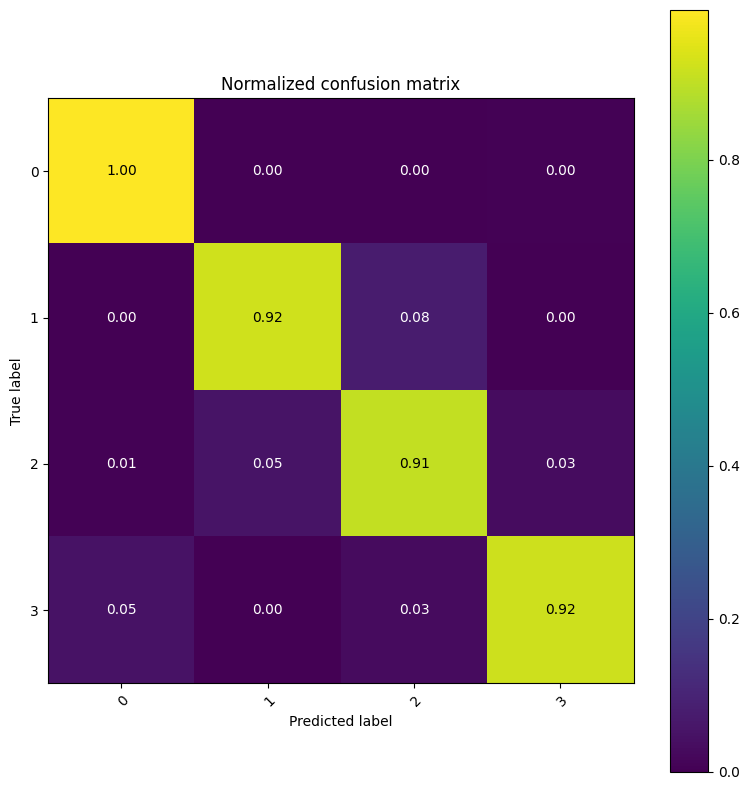

In [45]:
plot_conf_mat(y_test, y_pred, class_names=np.array(sorted(set(y_test))))

On remarque que le modèle détecte à chaque fois quand il n'y a personnes dans la salle 100%. Pour les autres classes, il y a 91% ou 92% de prédictions correctes.

On va essayer de traiter les déséquilibres des classes pour avoir la meme représentation de chaque classe. Car comme la 0 prédomine, si on prédit toujours 0, on aura de bonnes performances

In [46]:
y_pred = [0 for i in range(len(y_test))]
accuracy_score(y_pred, y_test)

0.8124383020730503

On remarque qu'on a quand meme une meilleure accuracy avec le classificateur.

On va générer des données synthétiques pour les classes minoritaires.

In [47]:
smote = SMOTE()

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
pd.value_counts(y_train_balanced)

C:\Users\riadh\AppData\Local\Temp\ipykernel_12064\92086123.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train_balanced)


Room_Occupancy_Count
0    6582
2    6582
3    6582
1    6582
Name: count, dtype: int64

Maintenant, toutes les classes ont le même nombre d'échantillons. On relance l'entrainement.

c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Normalized confusion matrix
[[0.9799514  0.         0.00121507 0.01883354]
 [0.         0.94565217 0.05434783 0.        ]
 [0.         0.06040268 0.9261745  0.01342282]
 [0.03597122 0.         0.02877698 0.9352518 ]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

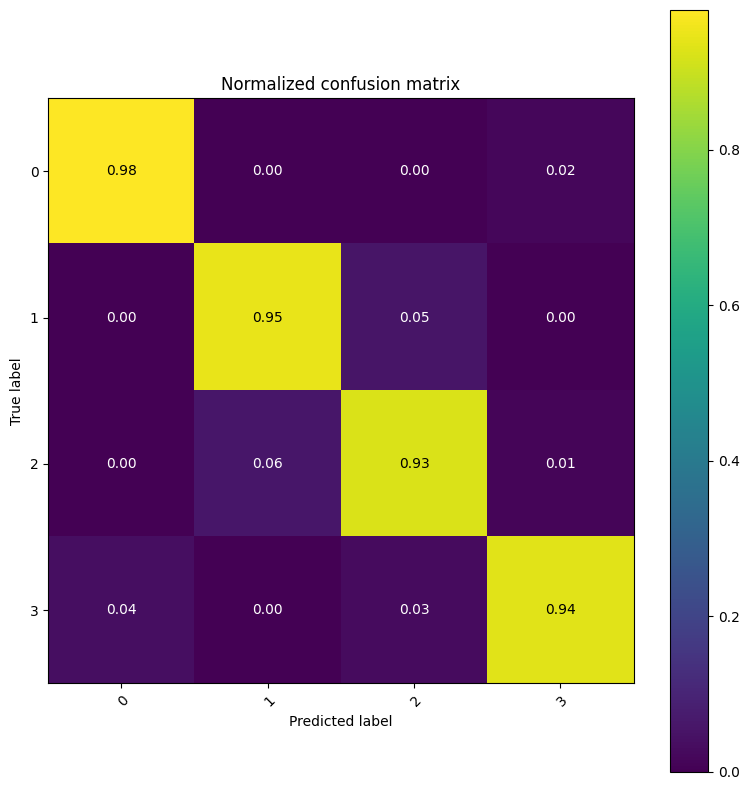

In [48]:
clf.fit(X_train_balanced, y_train_balanced)
y_pred = clf.predict(X_test)
plot_conf_mat(y_test, y_pred,class_names=np.array(sorted(set(y_test))))

In [49]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1646
           1       0.91      0.95      0.93        92
           2       0.93      0.93      0.93       149
           3       0.80      0.94      0.86       139

    accuracy                           0.97      2026
   macro avg       0.91      0.95      0.93      2026
weighted avg       0.97      0.97      0.97      2026



In [50]:
accuracy_smote = accuracy_score(y_pred, y_test)
print(accuracy_smote)
f1_smote = f1_score(y_test, y_pred, average='macro')
print(f1_smote)

0.9713721618953604
0.925247851748262


Le résultat est moins bon qu'avant. Rajouter autant d'echantillons dans les classes 1 à 3 n'est pas représentatif

Cherchons à régulariser

In [51]:
GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500), [] ).get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

parameters_to_test = [{ 'C': [1e-9, 1e-3, 0.01, 0.1, 1, 10, 100, 1000, 10000] }]

# The different scoring metrics available are in:
#     https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500), parameters_to_test, cv=k_fold,
                    scoring='accuracy')



In [54]:
grid.fit(X_train, y_train)
print("The best regularization weigth is ", grid.best_params_)

c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\riadh\AppData\Local\Programs\Python\P

The best regularization weigth is  {'C': 10000}


c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Résultat sans SMOTE avec KFolds
Normalized confusion matrix
[[0.9945322  0.         0.         0.0054678 ]
 [0.         0.91304348 0.08695652 0.        ]
 [0.         0.04697987 0.93959732 0.01342282]
 [0.08633094 0.         0.02877698 0.88489209]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

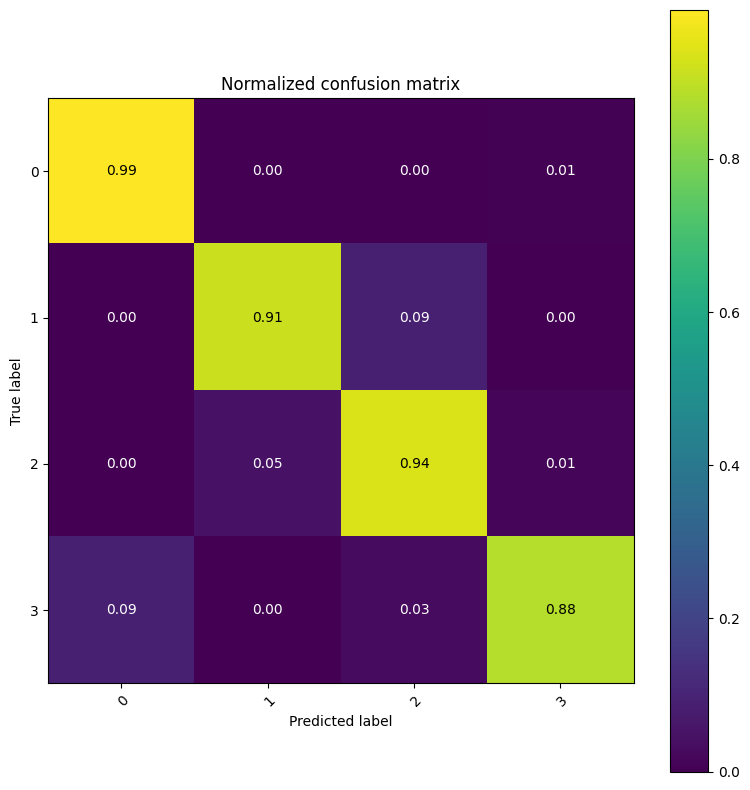

In [55]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)
print("Résultat sans SMOTE avec KFolds")
plot_conf_mat(y_test, y_pred,class_names=np.array(sorted(set(y_test))))

c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\riadh\AppData\Local\Programs\Python\P

The best regularization weigth is  {'C': 100}
Résultat avec SMOTE avec KFolds
une accuracy de  0.9787759131293189
Normalized confusion matrix
[[0.9945322  0.         0.         0.0054678 ]
 [0.         0.91304348 0.08695652 0.        ]
 [0.         0.05369128 0.93288591 0.01342282]
 [0.08633094 0.         0.02877698 0.88489209]]


c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

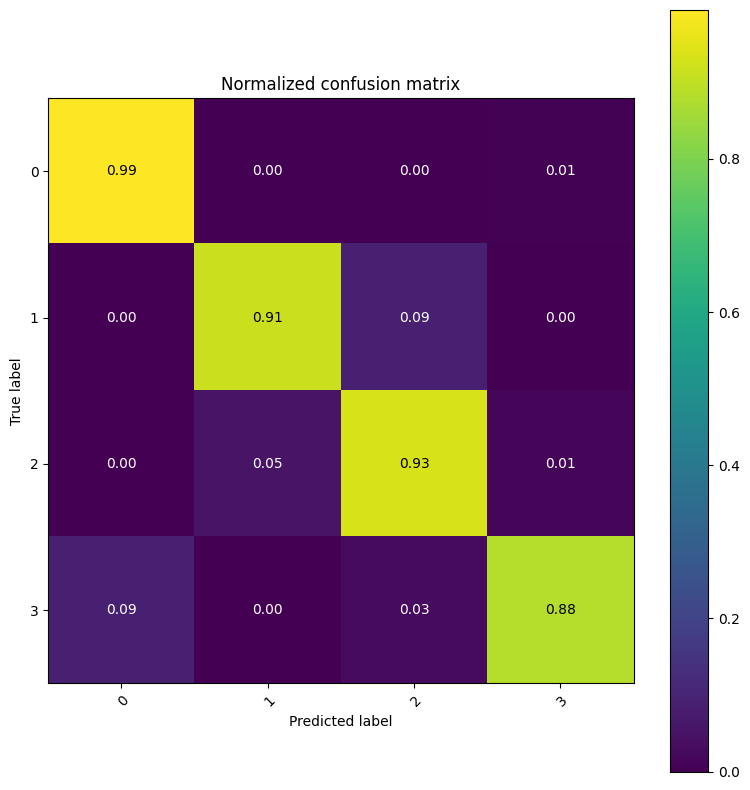

In [56]:
grid.fit(X_train_balanced, y_train_balanced)
print("The best regularization weigth is ", grid.best_params_)

clf = grid.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print("Résultat avec SMOTE avec KFolds")
print("une accuracy de ", accuracy)
plot_conf_mat(y_test, y_pred,class_names=np.array(sorted(set(y_test))))

In [58]:
accuracy_grid = accuracy_score(y_pred, y_test)
print(accuracy_grid)
f1_grid = f1_score(y_test, y_pred, average='macro')
print(f1_grid)

0.9787759131293189
0.9336089382896139


On n'a pas réussi à faire améliorer l'accuracy. Par contre l'ajout d'un KFold donne une moyenne de perfomances surement plus proche des performances réelles de notre modèle

## Comparaison des modèles

In [59]:
# Données de performance des modèles
models = ['Simple', 'SMOTE', 'GridSearch']
accuracy_scores = [accuracy_simple, accuracy_smote, accuracy_grid]
f1_scores = [f1_simple, f1_smote, f1_grid]

# Création du DataFrame pour afficher les résultats sous forme de tableau
results_df = pd.DataFrame({
    'Modèle': models,
    'Accuracy': accuracy_scores,
    'F1-score': f1_scores,
})

# Affichage du tableau
print(results_df)

       Modèle  Accuracy  F1-score
0      Simple  0.980750  0.936795
1       SMOTE  0.971372  0.925248
2  GridSearch  0.978776  0.933609


## Neural Networks

In [60]:
!pip install -U imblearn
!pip install tensorflow

!pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 409.6 kB/s eta 0:00:26
   - -------------------------------------- 0.5/11.1 MB 409.6 kB/s eta 0:00:26
   --- ------------------------------------ 1.0/11.1 MB 786.4 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 932.1 kB/s eta 0:00:11
   ------ --------------------------------- 1.8/11.1 MB 1.1 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.1 MB 1.2 MB/s eta 0:00:08
   --------- ------------------------------ 2.6/11.1 MB 1.3 MB/s eta 0:00:07
   ----------- ---------------------------- 3.1/11.1 MB 1.4 MB/s eta 0:00:06
   ------------ ----------

  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.optimizers import Adam

In [68]:
pip uninstall scikit-learn


^C
Note: you may need to restart the kernel to use updated packages.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime # Import the datetime module

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report

import random
# import category_encoders as ce

import tensorflow as tf

In [65]:
# The following library is to plot the loss during training
# https://github.com/stared/livelossplot
! pip install livelossplot
from livelossplot import PlotLossesKerasTF

import os
from os.path import isfile

from functools import partial

   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.0 MB 246.8 kB/s eta 0:00:27
   -- ------------------------------------- 0.5/7.0 MB 246.8 kB/s eta 0:00:27
   ---- ----------------------------------- 0.8/7.0 MB 342.4 kB/s eta 0:00:19
   ---- ----------------------------------- 0.8/7.0 MB 342.4 kB/s eta 0:00:1


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
def make_sequential_model(sample_size, layer_sizes,
                          hidden_activation_function="relu",
                          out_activation_function="softmax",
                          loss_fun="categorical_crossentropy",
                          learning_rate=0.01,
                          regularization_coeff=0,
                          metrics=['accuracy']):
  """
  Makes a sequential model.
  Parameters
  -------------------------
  sample_size: integer
    The number of features of the samples

  layer_sizes: list
    List of the size of the neural network layers. For instance, if
    layer_sizes = [8, 6, 4], the 1st layer will have 8 neurons, the 2nd 6 etc.
    Attention: the size of the last layer (the output layer) is not arbitrary.
    In case of monodimensional regression, it must be 1.
    When using categorical_crossentropy, it must be the same as the number of
    categories.
    When using binary_crossentropy, it must be 1.

  inner_activation_function: string
    Activation function used in all layers, except the last one.
    Ex: "relu"

  out_activation_function: string
    Activation function of the last layer.
    Ex. "softmax"

  loss_fun: string
    The loss function we want to minimize. Ex. categorical_crossentropy

  learning_rate: float
    Ex. 0.01

  regularization_coeff: float
    Coefficient of ridge regression
    Ex. 0.01

  metrics: list of strings
    The metrics we want to show during training. Ex. ['accuracy']
  """

  model = Sequential()


  # In the next code we will use `partial`, which is a function of the ptyhon
  # library functools, which allows to define a class, identical to another
  # class but with some different default values.
  # In our case we define MyDenseLayer equal to the standard keras class
  # `Dense`, which implements a simple neural network layer, specifying
  # two default values: one for the activation function, and another for the
  # regularization

  if (regularization_coeff==0):
    # No regularization
    MyDenseLayer = partial(Dense, activation=hidden_activation_function)
  else:
    MyDenseLayer = partial(Dense, activation=hidden_activation_function,
                         kernel_regularizer=keras.regularizers.l2(regularization_coeff))

  # Add the input layer
  model.add( MyDenseLayer(layer_sizes[0],
                  input_dim = sample_size) )

  # Add hidden layers
  for i in range(1,len(layer_sizes)-1 ): # We iterate from the 2nd element to the penultimate
    model.add( MyDenseLayer(layer_sizes[i]) )

  # Add output layer
  model.add( Dense(layer_sizes[-1],
                  activation = out_activation_function) )

  chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(loss=loss_fun,
              optimizer=chosen_optimizer ,
              metrics=metrics, )

  return model

In [71]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [72]:
model = make_sequential_model(sample_size=X_train.shape[1],
    layer_sizes=[32, 16, 4])

c:\Users\riadh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,044 (4.08 KB)

 Trainable params: 1,044 (4.08 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
def enforce_reproducibility(seed):
  keras.backend.clear_session()

  # To know more:
  #       https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
  random.seed(seed)
  np.random.seed(random.randint(0,300000))
  tf.random.set_seed(random.randint(0,300000))


In [75]:
def train_model(model, nn_file, X_tr, y_tr, seed, max_epochs=1000,
                overwrite=True, validation_split=0.2, patience=20):
  """
  model: neural network model
            It must be a compiled neural network, e.g., a model issued by the
            function make_sequential_model(..) defined before

  nn_file:  string (name of a file)
            This file will be used to store the weights of the trained neural
            network. Such weights are automatically stored during training
            (thanks to the ModelCheckpoint callback (see the implementation
            code)), so that even if the code fails in the middle of training,
            you can resume training without starting from scratch.
            If the file already exists, before starting training, the weights
            in such a file will be loaded, so that we do not start training from
            scratch, but we start already from (hopefully) good weigths.

  overwrite: boolean
            If true, the model will be built and trained from scratch,
            indipendent of whether nn_file exists or not.

  seed: integer

  X_tr: matrix
            Feature matrix of the training set

  y_tr: matrix
            True labels of the training set

  max_epochs: integer
            Training will stop after such number of epochs

  validation_split: float (between 0 and 1)
            Fraction of training dataset that will be used as validation

  patience: integer
            Training will stop if the validation loss does not improve after the
            specified number of epochs
  """

  enforce_reproducibility(seed)

  # Before starting training, Keras divides (X_tr, y_tr) into a training subset
  # and a validation subset. During iterations, Keras will do backpropagation
  # in order to minimize the loss on the trainins subset, but it will monitor
  # and also plot the loss on the validation subset.
  # However, Keras always takes the first part of (X_tr, y_tr) as training
  # subset and the second part as validation subset. This can be bad, in case
  # the dataset has been created with a certain order (for instance all the
  # samples with a certain characteristic first, and then all the others), as
  # we instead need to train the neural network on a representative subset of
  # samples. For this reason, we first shuffle the dataset
  X_train, y_train = shuffle(X_tr, y_tr, random_state=seed)


  ##################
  #### CALLBACKS ###
  ##################
  # These functions are called at every epoch
  #log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  plot_cb = PlotLossesKerasTF()  # Plots the loss # new code should be tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) #
  checkpoint_cb = ModelCheckpoint(nn_file) # Stores weights
  logger_cb = CSVLogger(nn_file+'.csv', append=True) # Stores history
                # see https://theailearner.com/2019/07/23/keras-callbacks-csvlogger/


  # To stop early if we already converged
  # See pagg 315-16 of [Ge19]
  early_stop_cb = tf.keras.callbacks.EarlyStopping(verbose=1,
      monitor='val_loss',
     patience=patience, restore_best_weights=True)


  if overwrite==True:
    try:
      os.remove(nn_file)
    except OSError:
      pass

    try:
      os.remove(nn_file+'.csv')
    except OSError:
      pass

  if isfile(nn_file):
    print("Loading pre-existing model")
    model = load_model(nn_file)

  history = model.fit(X_train, y_train, epochs=max_epochs,
                      validation_split=validation_split,
                      callbacks = [plot_cb, checkpoint_cb, logger_cb, early_stop_cb])


  return history

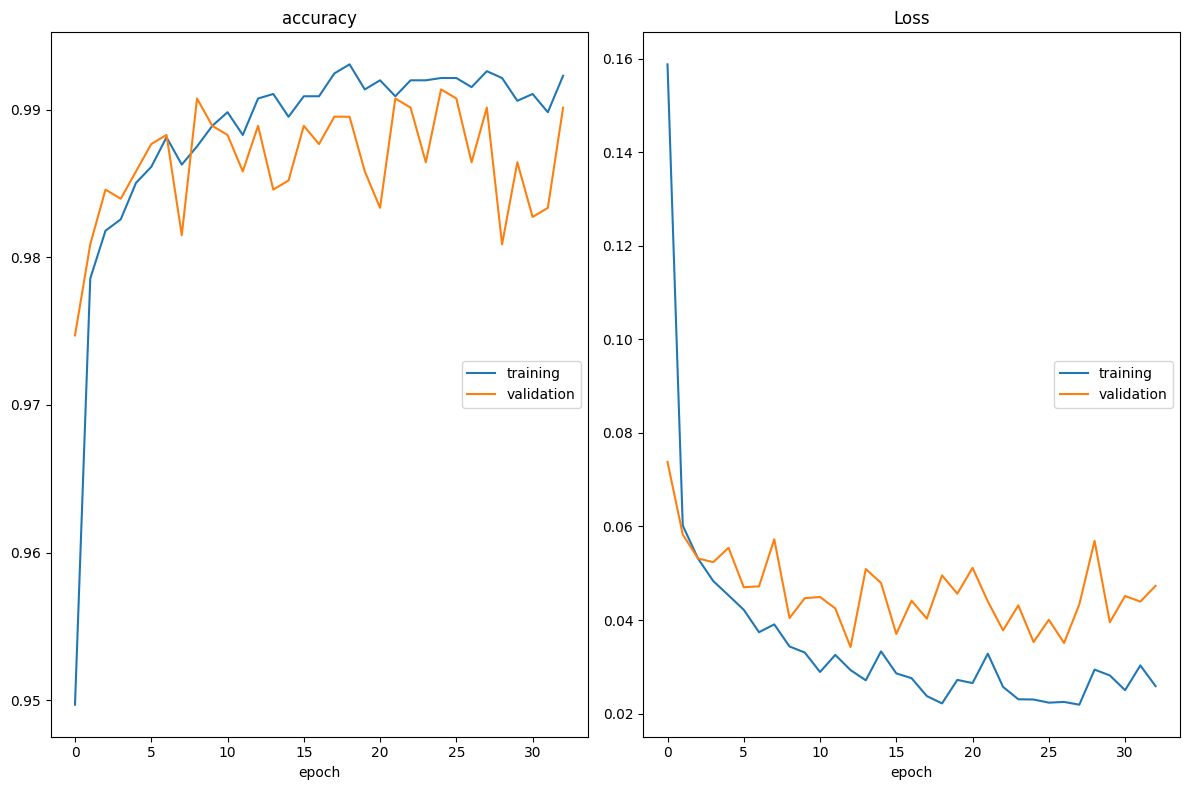

accuracy
	training         	 (min:    0.950, max:    0.993, cur:    0.992)
	validation       	 (min:    0.975, max:    0.991, cur:    0.990)
Loss
	training         	 (min:    0.022, max:    0.159, cur:    0.026)
	validation       	 (min:    0.034, max:    0.074, cur:    0.047)
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9941 - loss: 0.0225 - val_accuracy: 0.9901 - val_loss: 0.0473
Epoch 33: early stopping
Restoring model weights from the end of the best epoch: 13.


In [76]:
history = train_model(
    model=model,
    nn_file="room_occupancy_nn.keras",
    X_tr=X_train,
    y_tr=y_train_cat,
    seed=42, max_epochs=100
)


In [77]:
nn_file = "room_occupancy_nn.keras"
model = load_model(nn_file)

In [78]:
y_proba = model.predict(X_test)
print( 'y_proba\n', y_proba)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
y_proba
 [[1.0000000e+00 5.6584935e-16 4.5146824e-09 4.2222467e-10]
 [1.0000000e+00 3.9004991e-20 2.1711237e-09 3.6755075e-11]
 [1.0000000e+00 1.1454567e-30 1.2694010e-29 3.4530284e-35]
 ...
 [5.5169715e-03 2.1374257e-11 6.9019574e-05 9.9441397e-01]
 [1.0000000e+00 0.0000000e+00 1.8644854e-32 2.4664286e-30]
 [1.0000000e+00 0.0000000e+00 4.2103099e-34 7.3760228e-29]]


Normalized confusion matrix
[[0.9981774  0.         0.         0.0018226 ]
 [0.         0.98913043 0.01086957 0.        ]
 [0.00671141 0.         0.98657718 0.00671141]
 [0.03597122 0.         0.08633094 0.87769784]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

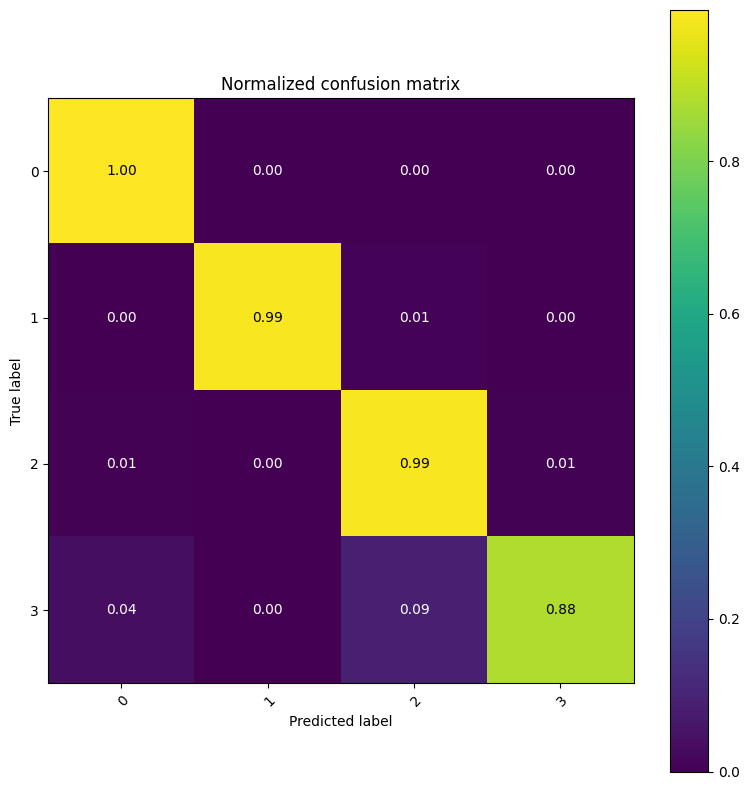

In [79]:
pred_label = np.argmax(y_proba,axis=1)
plot_conf_mat(y_test, pred_label ,class_names=np.array(sorted(set(y_test))))

## SVM

In [80]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)


SVC(C=10)

In [81]:
y_pred = svm_model.predict(X_test)


calcul d'Accurancy et affichage de Matrice de confusion

In [82]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9921026653504442

Classification Report:
               precision    recall  f1-score   support

           0      0.999     0.998     0.998      1646
           1      0.989     0.989     0.989        92
           2      0.966     0.966     0.966       149
           3      0.943     0.957     0.950       139

    accuracy                          0.992      2026
   macro avg      0.974     0.977     0.976      2026
weighted avg      0.992     0.992     0.992      2026


Confusion Matrix:
 [[1642    0    0    4]
 [   0   91    1    0]
 [   0    1  144    4]
 [   2    0    4  133]]


F1-score macro

In [83]:
from sklearn.metrics import f1_score

f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1-score (macro) :", round(f1_macro, 4))


F1-score (macro) : 0.9759


RANDOM FOREST


In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from visualization import plot_feature_importances




In [85]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [87]:
y_pred_rf = rf_model.predict(X_test)



In [88]:

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score (macro):", f1_score(y_test, y_pred_rf, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9945705824284304
F1-score (macro): 0.9835377531518394

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1646
           1       0.99      1.00      0.99        92
           2       0.97      0.99      0.98       149
           3       0.96      0.96      0.96       139

    accuracy                           0.99      2026
   macro avg       0.98      0.99      0.98      2026
weighted avg       0.99      0.99      0.99      2026



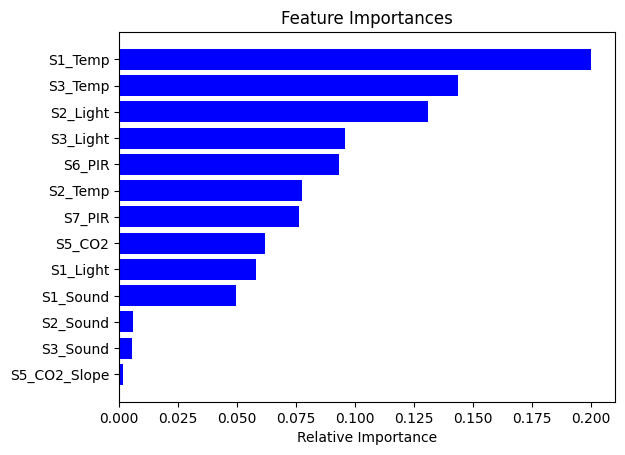

In [92]:

plot_feature_importances(rf_model.feature_importances_, X.columns)


Normalized confusion matrix
[[0.99756987 0.         0.         0.00243013]
 [0.         1.         0.         0.        ]
 [0.         0.00671141 0.98657718 0.00671141]
 [0.         0.         0.03597122 0.96402878]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

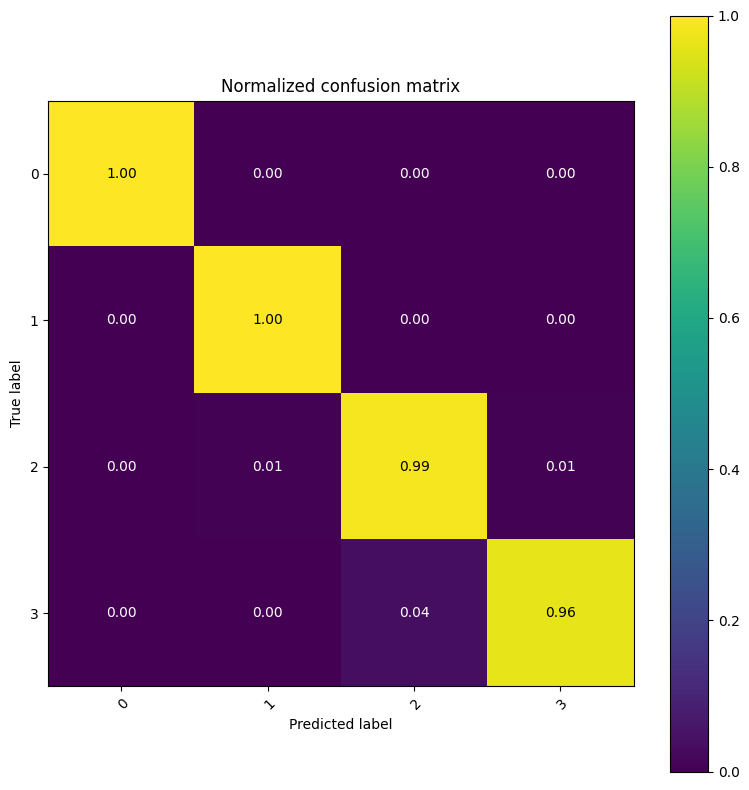

In [89]:
from visualization import plot_conf_mat
import numpy as np

class_names = np.array(sorted(y_test.unique()))
plot_conf_mat(y_test, y_pred_rf, class_names)


Comparaison de modèles

In [104]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Scores
acc_svm = accuracy_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred, average='macro')

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Affichage comparatif
print("🔍 Performance Comparison")
print("----------------------------")
print(f"SVM        → Accuracy: {acc_svm:.4f} | F1 (macro): {f1_svm:.4f}")
print(f"RandomForest → Accuracy: {acc_rf:.4f} | F1 (macro): {f1_rf:.4f}")


🔍 Performance Comparison
----------------------------
SVM        → Accuracy: 0.9921 | F1 (macro): 0.9759
RandomForest → Accuracy: 0.9946 | F1 (macro): 0.9835


Normalized confusion matrix
[[0.99756987 0.         0.         0.00243013]
 [0.         0.98913043 0.01086957 0.        ]
 [0.         0.00671141 0.96644295 0.02684564]
 [0.01438849 0.         0.02877698 0.95683453]]
Normalized confusion matrix
[[0.99756987 0.         0.         0.00243013]
 [0.         1.         0.         0.        ]
 [0.         0.00671141 0.98657718 0.00671141]
 [0.         0.         0.03597122 0.96402878]]


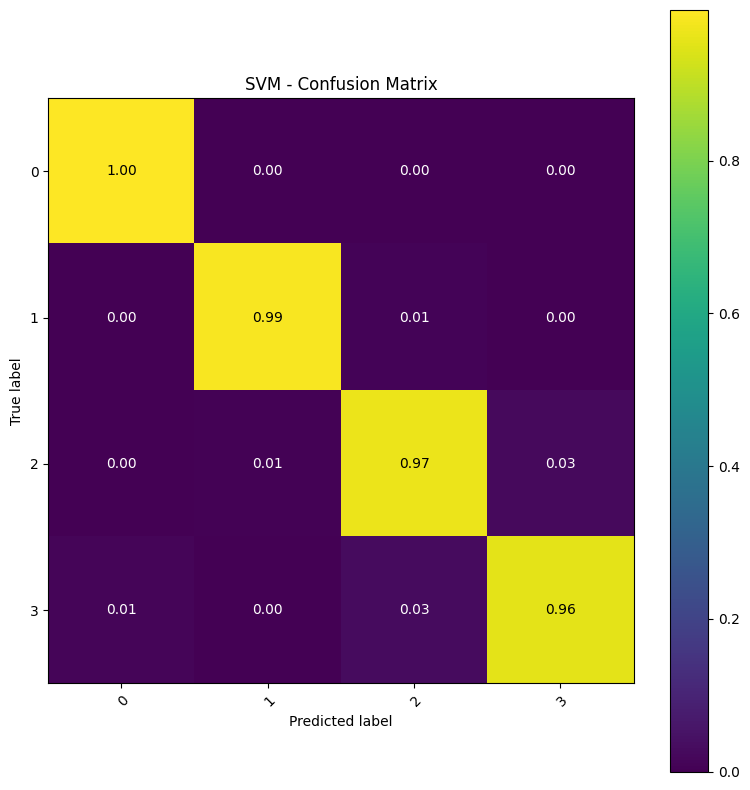

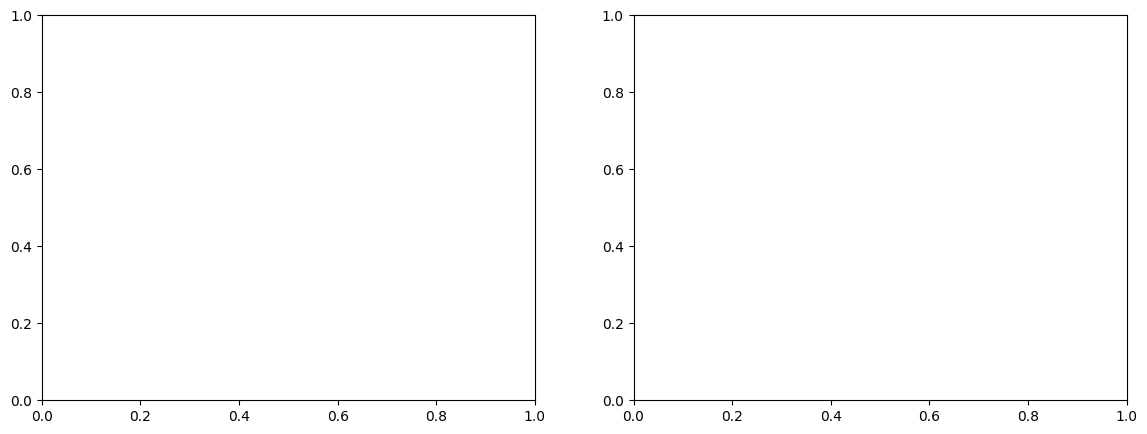

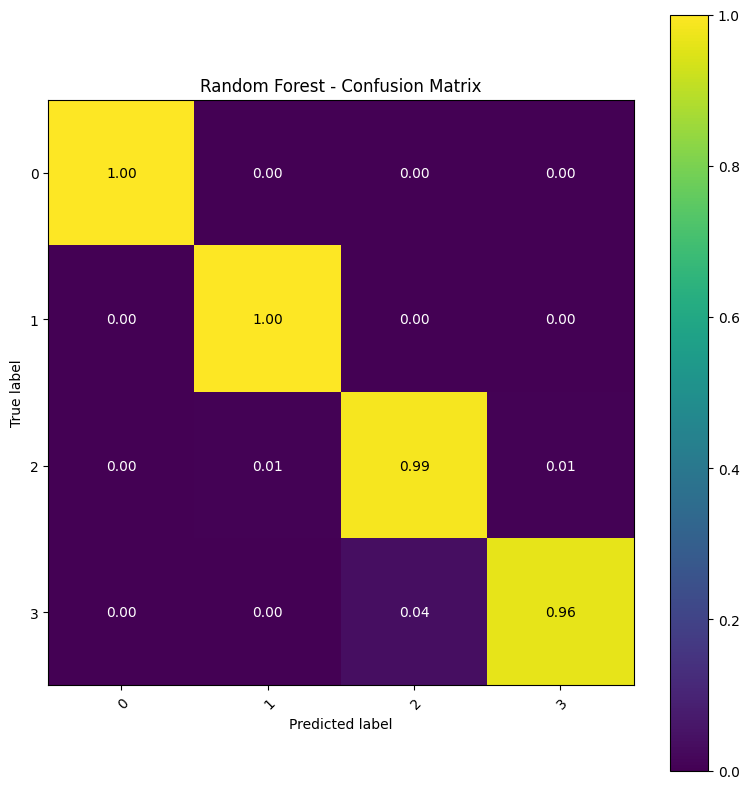

In [105]:
import matplotlib.pyplot as plt
from visualization import plot_conf_mat

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# SVM
plt.sca(axs[0])
plot_conf_mat(y_test, y_pred, class_names)
plt.title("SVM - Confusion Matrix")

# Random Forest
plt.sca(axs[1])
plot_conf_mat(y_test, y_pred_rf, class_names)
plt.title("Random Forest - Confusion Matrix")

plt.tight_layout()
plt.show()


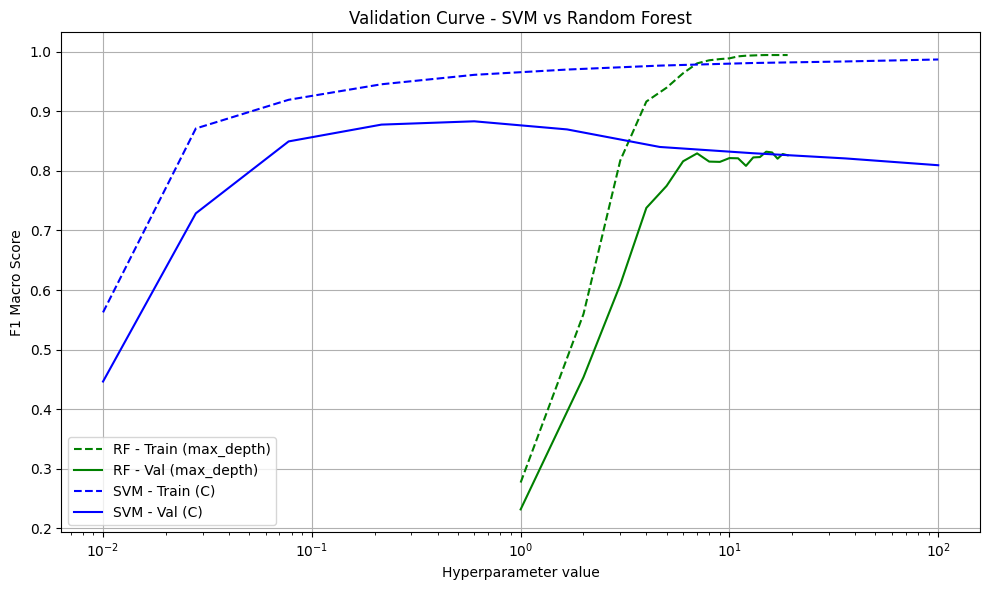

In [109]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# ---- Random Forest ----
depth_range = range(1, 20)
rf_train_scores, rf_test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_scaled, y,
    param_name="max_depth",
    param_range=depth_range,
    cv=5,
    scoring="f1_macro"
)

# ---- SVM ----
C_range = np.logspace(-2, 2, 10)  # e.g., [0.01, 0.1, 1, 10, 100]
svm_train_scores, svm_test_scores = validation_curve(
    SVC(kernel='rbf'),
    X_scaled, y,
    param_name="C",
    param_range=C_range,
    cv=5,
    scoring="f1_macro"
)

# ---- Moyennes ----
rf_train_mean = rf_train_scores.mean(axis=1)
rf_test_mean = rf_test_scores.mean(axis=1)

svm_train_mean = svm_train_scores.mean(axis=1)
svm_test_mean = svm_test_scores.mean(axis=1)

# ---- Plot ----
plt.figure(figsize=(10, 6))

plt.plot(depth_range, rf_train_mean, label="RF - Train (max_depth)", linestyle='--', color='green')
plt.plot(depth_range, rf_test_mean, label="RF - Val (max_depth)", color='green')

plt.plot(C_range, svm_train_mean, label="SVM - Train (C)", linestyle='--', color='blue')
plt.plot(C_range, svm_test_mean, label="SVM - Val (C)", color='blue')

plt.xscale('log')  # utile pour les C logspace
plt.xlabel("Hyperparameter value")
plt.ylabel("F1 Macro Score")
plt.title("Validation Curve - SVM vs Random Forest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
